In [94]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split


## Q1

In [4]:
df = pd.read_csv('2013_movies.csv')

In [47]:
df = df.dropna()
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


In [6]:
#X = df.loc[:,'Budget']
y = df['DomesticTotalGross']

In [19]:
lr_model = LinearRegression(fit_intercept=False)

In [20]:
lr_model.fit(np.ones((len(y),1)), y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [21]:
lr_model.coef_

array([  1.00596875e+08])

This model simply calculates a constant for this model. It uses the mean to do so.

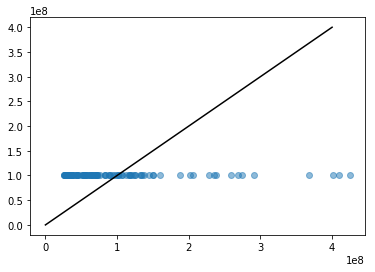

In [36]:
lr_predict = lr_model.predict(np.ones((len(y),1)))

plt.scatter(y, lr_predict, alpha=.50)
plt.plot(np.linspace(0,4*10**8,1000),np.linspace(0,4*10**8,1000), color = 'k');

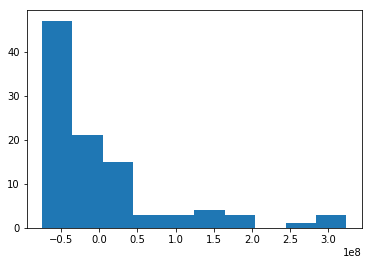

In [38]:
residuals = y - lr_predict
plt.hist(residuals);

Residuals are skew towards higher numbers.

## Q2

In [67]:
X = df.loc[:,['Budget']]
y = df['DomesticTotalGross']

In [68]:
lr_model2 = LinearRegression(fit_intercept=True)

In [69]:
lr_model2.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [70]:
lr_model2.coef_

array([ 0.783055])

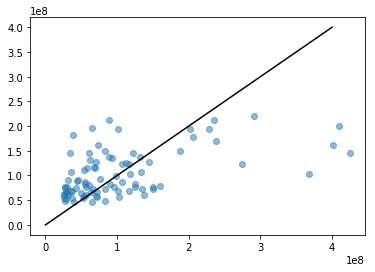

In [55]:
lr_predict = lr_model2.predict(X)

plt.scatter(y, lr_predict, alpha=.50)
plt.plot(np.linspace(0,4*10**8,1000),np.linspace(0,4*10**8,1000), color = 'k');

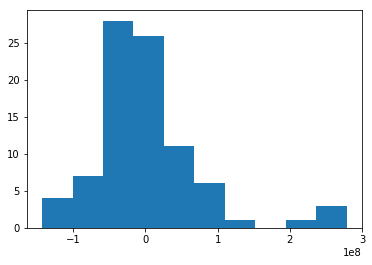

In [56]:
residuals = y - lr_predict
plt.hist(residuals);

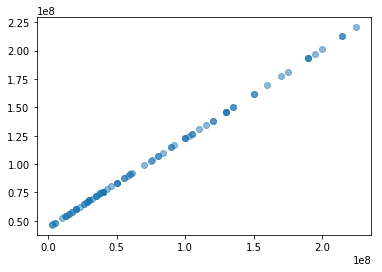

In [57]:
plt.scatter(X, lr_predict, alpha=.50)

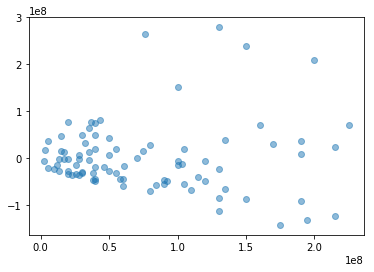

In [58]:
plt.scatter(X, residuals, alpha=.50)

The model is predicting a straight line for the movies' revenues based on budgets.

## Q3

In [72]:
X = pd.get_dummies(df['Rating'])
y = df['DomesticTotalGross']

In [73]:
lr_model3 = LinearRegression(fit_intercept=True)

In [74]:
lr_model3.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [75]:
lr_model3.coef_

array([ 23979059.30999278,   9759802.16356421, -33738861.47355697])

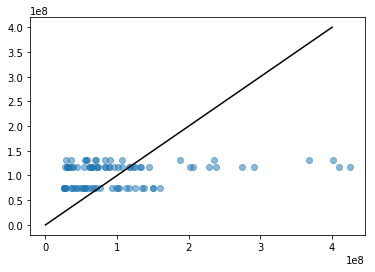

In [76]:
lr_predict = lr_model3.predict(X)

plt.scatter(y, lr_predict, alpha=.50)
plt.plot(np.linspace(0,4*10**8,1000),np.linspace(0,4*10**8,1000), color = 'k');

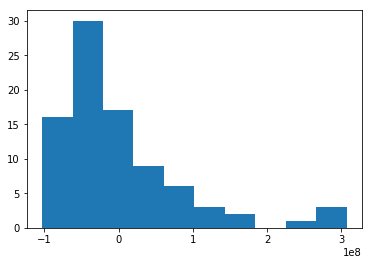

In [77]:
residuals = y - lr_predict
plt.hist(residuals);

The model is predicting a different constant value for each rating.

## Q4

In [86]:
df['ReleaseDate_ord'] = pd.to_datetime(df.ReleaseDate, format='%Y-%m-%d').apply(lambda x: x.toordinal())
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,ReleaseDate_ord
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22,735194
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03,734991
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22,735194
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03,735052
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14,735033


In [88]:

X = df.loc[:,['Budget', 'ReleaseDate_ord', 'Runtime']]
X = pd.concat([X, pd.get_dummies(df['Rating'])], axis=1)

y = df['DomesticTotalGross']

In [89]:
lr_model4 = LinearRegression(fit_intercept=True)

In [90]:
lr_model4.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [92]:
lr_model4.coef_

array([  7.04934233e-01,   1.74993491e+04,   5.84926211e+05,
         1.70751149e+07,  -9.50552307e+06,  -7.56959186e+06])

## Q5

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [96]:
lr_model4.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

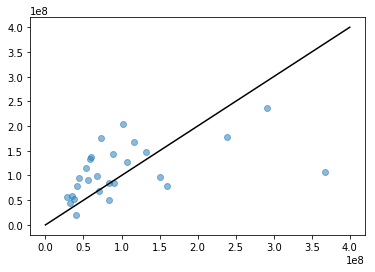

In [97]:
lr_predict = lr_model4.predict(X_test)

plt.scatter(y_test, lr_predict, alpha=.50)
plt.plot(np.linspace(0,4*10**8,1000),np.linspace(0,4*10**8,1000), color = 'k');